## Семинар 2

# Тема: Построение 3D-графиков. Метод градиентного спуска

Импортируем необходимые библиотеки:

In [ ]:
import numpy as np
import pandas as pnd
import matplotlib.pyplot as plt

### Пример построения 3D-графика функции $z = x^2 + y^2$ на квадрате $[-10;10]\times[-10;10]$.

In [ ]:
def z(x, y):
    return x**2 + y**2

In [ ]:
N = 100
x = np.linspace(-10,10,N)
y = np.linspace(-10,10,N)
x_grid, y_grid = np.meshgrid(x, y)

In [ ]:
z_grid = z(x_grid, y_grid)

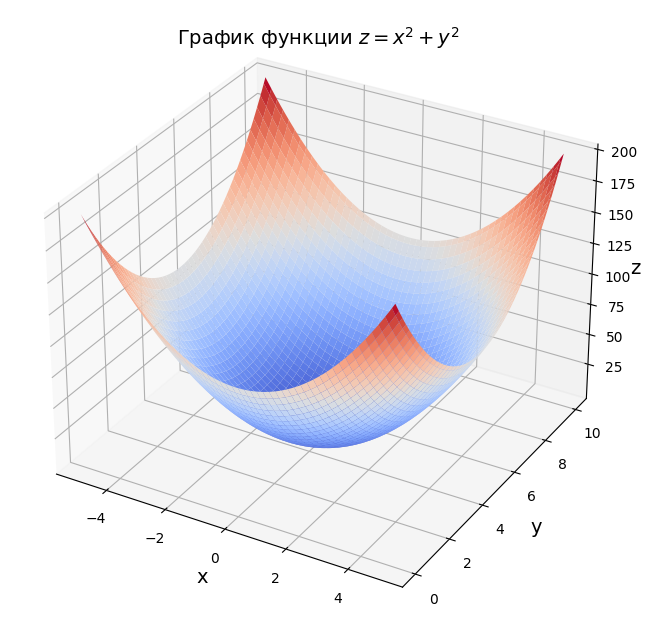

In [ ]:
fig = plt.figure(figsize = [10, 8])
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x_grid, y_grid, z_grid, cmap='coolwarm')

ax.set_title('График функции $z = x^2 + y^2$', fontsize=14, y = 1.01 )
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14, labelpad = -2)

plt.show()

### Метод градиентного спуска
Функция $y = f(x_1, x_2,\dots , x_n)$ - непрерывно-дифференцируемая и выпукла.

Требуется найти некоторую точку $(x^{*}_1, x^{*}_2,\dots , x^{*}_n)$ локального минимума этой функции.

*Для применения метода градиентного спуска нужно выполнить следующие действия*:
1) Вычислить градиент функции:
$\overrightarrow {grad f} = (\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2} , \dots,  \frac{\partial f}{\partial x_n})^T$
2) Задать начальное значение $(x^{0}_1, x^{0}_2,\dots , x^{0}_n)^T$

3) Задать скорость обучения (learning rate) $\alpha = \alpha_0$

4) Задать количество шагов градиентного спуска $k = k_0$

5) На каждом шаге менять все переменные, от которых зависит функция, по формуле:

$$\vec{x}^{j+1} = \vec{x}^{j} - \alpha \cdot \overrightarrow{grad f} (x_{1}^{j},x_{2}^{j},\dots ,x_{n}^{j}), j = 0, 1, ..., k_0 -1$$


### Пример нахождения точки минимума функции $f(w) =w ^ 2$ методом градиентного спуска.
Считаем, что точка минимума найдена, если значение производной в ней равно нулю с точностью 4-знака после запятой. Метод градиентного спуска может расходиться. Будем считать, что он расходится, если числа становятся велики (больше 1000000).

In [ ]:
def derivative_f(w):
    return 2 * w

In [ ]:
def Gradient_Discent(derivative_f, w_start, learning_rate=0.1, max_iter=100):
    """
    Реализация градиентного спуска для функций с одним локальным минимумом, совпадающим с глобальным.
    """
    w = w_start
    for _ in range(max_iter):
        w = w - learning_rate * derivative_f(w)
        #print( w, derivative_f(w))
    assert -1e+06 < w and w < 1e+06, "Расходимость: слишком большой learning_rate, либо неудачно выбрана начальная точка, либо минимум не достигается"
    assert -1e-04 < derivative_f(w) and derivative_f(w) < 1e-04, "Недостаточно шагов градиентного спуска"

    return w

In [ ]:
w_min = Gradient_Discent(derivative_f, w_start=np.random.random(1))

In [ ]:
np.round(w_min)

array([0.])

# Задания для самостоятельного выполнения

### 1. Задайте квадратную область на плоскости $[-5;5]\times[0;10]$ cеткой точек $10\times 10$. Визуализируйте эти точки на диаграмме рассеивания.
Указание: Используйте метод [meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) библиотеки numpy.

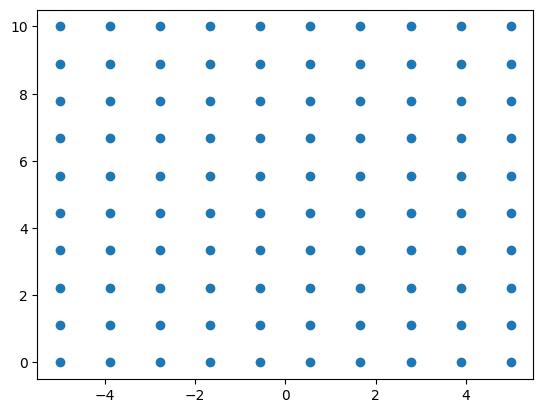

In [ ]:
N=10
x = np.linspace(-5,5,N)
y = np.linspace(0,10,N)
x_grid, y_grid = np.meshgrid(x, y)

plt.scatter(x_grid, y_grid)
plt.show()

### 2. Запрограммируйте функцию $z = x^2 + (y - 5)^2 + 4$. Вычислите значения этой функции в точках, построенной сетки.

In [ ]:
def z(x, y):
  return x**2 + (y - 5)**2 + 4

In [ ]:
f_grid = z(x_grid, y_grid)

### 3. Постройте 3D-график функции  $z = x^2 + (y - 5)^2 + 4$ на квадрате $[-5;5]\times[0;10]$, используя построенную сетку. Изобразите на графике и саму сетку.
Указание: Для изображения сетки используйте метод [scatter3D](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html), указав по третьей координате нули.

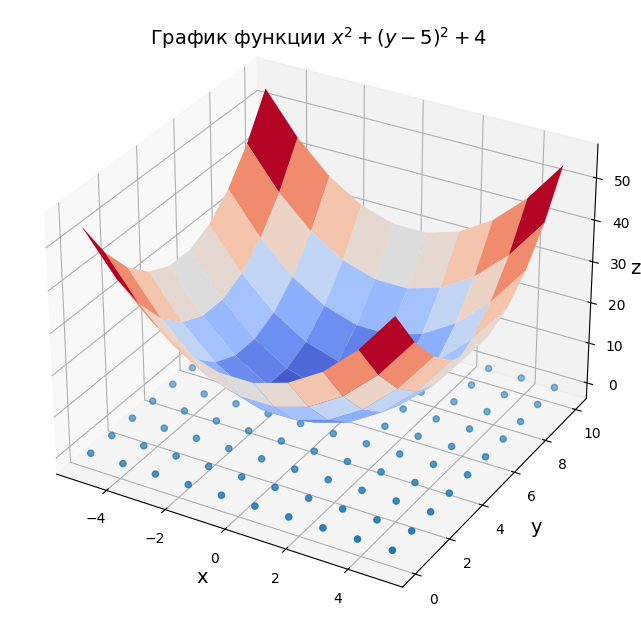

In [ ]:
fig = plt.figure(figsize = [10, 8])
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x_grid, y_grid, f_grid, cmap='coolwarm')

ax.set_title('График функции $x^2 + (y - 5)^2 + 4$', fontsize=14, y = 1.01 )
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14, labelpad = -2)
ax.scatter3D(x_grid, y_grid, np.zeros(x_grid.shape))

plt.show()

### 4. Постройте 3D-график функции $z = x^2 + (y - 5)^2 + 4$ на квадрате $[-5;5]\times[0;10]$, используя более мелкую сетку размера $100\times 100$. Саму сетку изображать не нужно. Поменяйте угол обзора графика.
Указание: При помощи ax.view_init(elev=35, azim=20) поменяйте угол обзора графика.

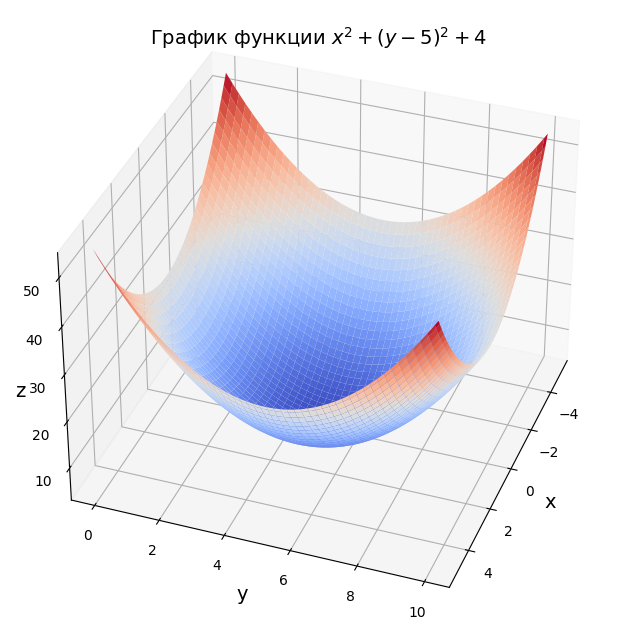

In [ ]:
N = 100
x = np.linspace(-5,5,N)
y = np.linspace(0,10,N)
x_grid, y_grid = np.meshgrid(x, y)
z_grid=x_grid**2+(y_grid-5)**2+4

fig = plt.figure(figsize = [10, 8])
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x_grid, y_grid, z_grid, cmap='coolwarm')

ax.set_title('График функции $x^2 + (y - 5)^2 + 4$', fontsize=14, y = 1.01 )
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14, labelpad = -2)
ax.view_init(elev=35, azim=20)

plt.show()

### 5. Постройте 2D-график линий уровня функции  $z = x^2 + (y - 5)^2 + 4$ на квадрате $[-5;5]\times[0;10]$.
Указание: Используйте метод [contour](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html) библиотеки matplotlib.

In [ ]:
N=100
x = np.linspace(-5,5,N)
y = np.linspace(0,10,N)
x_grid, y_grid = np.meshgrid(x, y)
z_grid=x_grid**2+(y_grid-5)**2+4

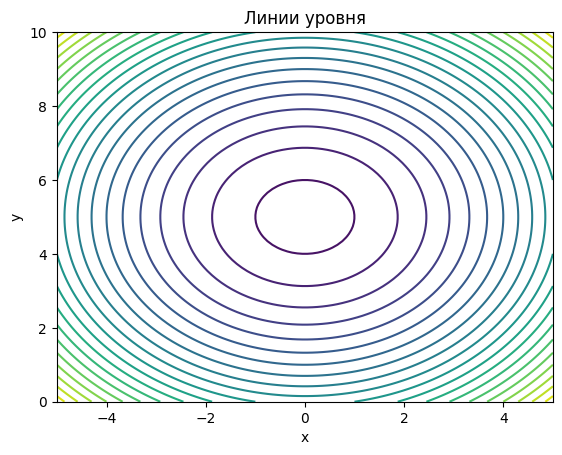

In [ ]:
plt.contour(x_grid, y_grid, z_grid, levels=20)
plt.title('Линии уровня')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 6. Постройте 3D-график линий уровня функции $z = x^2 + (y - 5)^2 + 4$ на квадрате $[-5;5]\times[0;10]$.

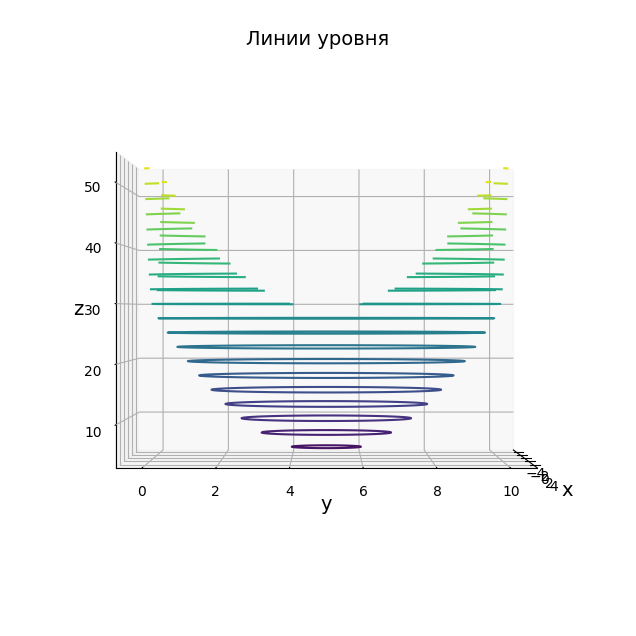

In [ ]:
fig = plt.figure(figsize = [10, 8])
ax = fig.add_subplot(projection='3d')

plt.contour(x_grid, y_grid, z_grid, levels=20)
ax.set_title('Линии уровня', fontsize=14, y = 1.01 )
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14, labelpad = -2)
#ax.view_init(elev=0, azim=0)

plt.show()

### 7. Постройте на одном 3D-графике функцию $z = x^2 + (y - 5)^2 + 4$ на квадрате $[-5;5]\times[0;10]$ и её линии уровня.
Указание: Для этого при построении поверхности укажите параметр прозрачности alpha=0.5.

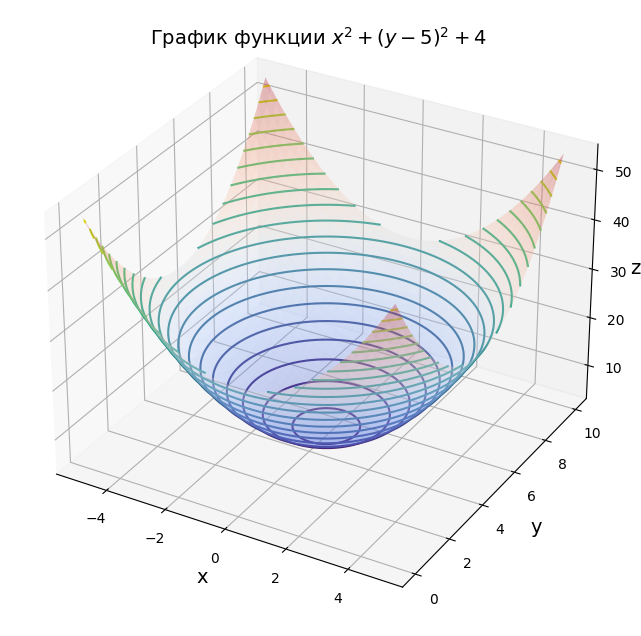

In [ ]:
N = 100
x = np.linspace(-5,5,N)
y = np.linspace(0,10,N)
x_grid, y_grid = np.meshgrid(x, y)
z_grid=x_grid**2+(y_grid-5)**2+4

fig = plt.figure(figsize = [10, 8])
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x_grid, y_grid, z_grid, cmap='coolwarm', alpha=0.3)

plt.contour(x_grid, y_grid, z_grid, levels=20)

ax.set_title('График функции $x^2 + (y - 5)^2 + 4$', fontsize=14, y = 1.01 )
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14, labelpad = -2)


plt.show()

### 8. Запрограммируйте функцию $f(w) =(w - 3 ) ^ 2$ и её производную. Вычислите значение функции и её производной в случайной точке.

In [ ]:
def f(w):
  return (w - 3) ** 2

def def_f(w):
  return 2*(w-3)

In [ ]:
f(np.random.uniform(-10, 10))

73.45893662004126

In [ ]:
def_f(np.random.uniform(-10, 10))

-12.713637119045082

### 9. Методом градиентного спуска найдите точку минимума функции одной переменной $f(w) =(w - 3 ) ^ 2$.
Указание: Для этого напишите функцию GD_1d, принимающую на вход производную функции одной переменной, начальную точуку, скорость обучения, количество шагов и реализующую метод градиентного спуска. Пусть эта функция возвращает не только саму точку минимума, а numpy-массив значений x на каждом шаге градиентного спуска.

In [ ]:
def derivative_f(w):
    return 2 * w - 6

In [ ]:
def Gradient_Discent(derivative_f, w_start, learning_rate=0.1, max_iter=100):
    """
    Реализация градиентного спуска для функций с одним локальным минимумом, совпадающим с глобальным.
    """
    w = w_start
    for _ in range(max_iter):
        w = w - learning_rate * derivative_f(w)
        #print( w, derivative_f(w))
    assert -1e+06 < w and w < 1e+06, "Расходимость: слишком большой learning_rate, либо неудачно выбрана начальная точка, либо минимум не достигается"
    assert -1e-04 < derivative_f(w) and derivative_f(w) < 1e-04, "Недостаточно шагов градиентного спуска"

    return w

In [ ]:
w_min = Gradient_Discent(derivative_f, w_start=np.random.random(1))

In [ ]:
np.round(w_min)

array([3.])

### 10. Визуализируйте процесс нахождения точки минимума функции $f(w) =(w - 3 ) ^ 2$ c learning_rate=0.1 и с learning_rate=0.9.
Указание: Для этого напишите функцию plot_GD_1d, принимающую на вход функцию одной переменной и шаги градиентного спуска, которая строит график этой функции и отмечает на нём точками шаги градиентного спуска, соединённые между собой пунктирной линией.

In [ ]:
def f(w):
  return (w - 3)**2


In [ ]:
def derivative_f(w):
    return 2 * w - 6

In [ ]:
def Gradient_Discent(derivative_f, w_start, learning_rate=0.9, max_iter=100):
    """
    Реализация градиентного спуска для функций с одним локальным минимумом, совпадающим с глобальным.
    """
    w = w_start
    coords=[w]

    for i in range(max_iter):
        c = (i - 3)**2
        w = w - learning_rate * derivative_f(w)
        coords.append(w)

    assert -1e+06 < w and w < 1e+06, "Расходимость: слишком большой learning_rate, либо неудачно выбрана начальная точка, либо минимум не достигается"
    assert -1e-04 < derivative_f(w) and derivative_f(w) < 1e-04, "Недостаточно шагов градиентного спуска"

    return coords

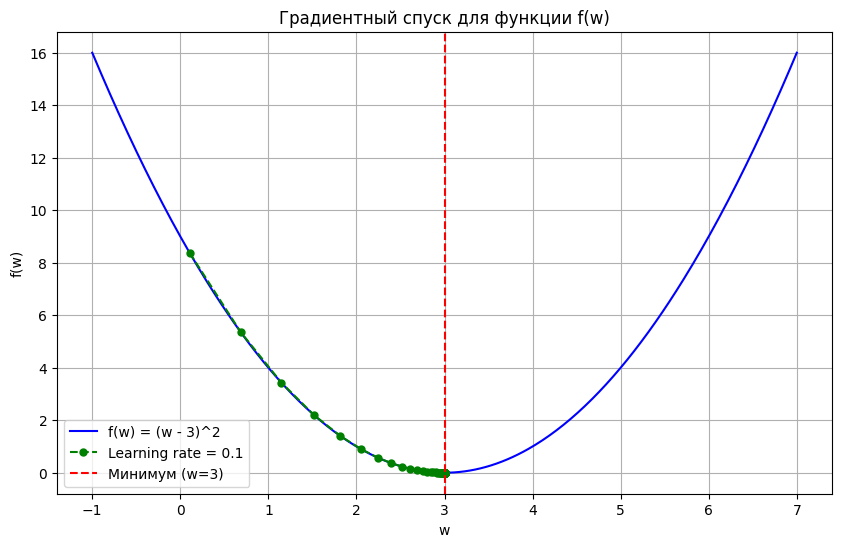

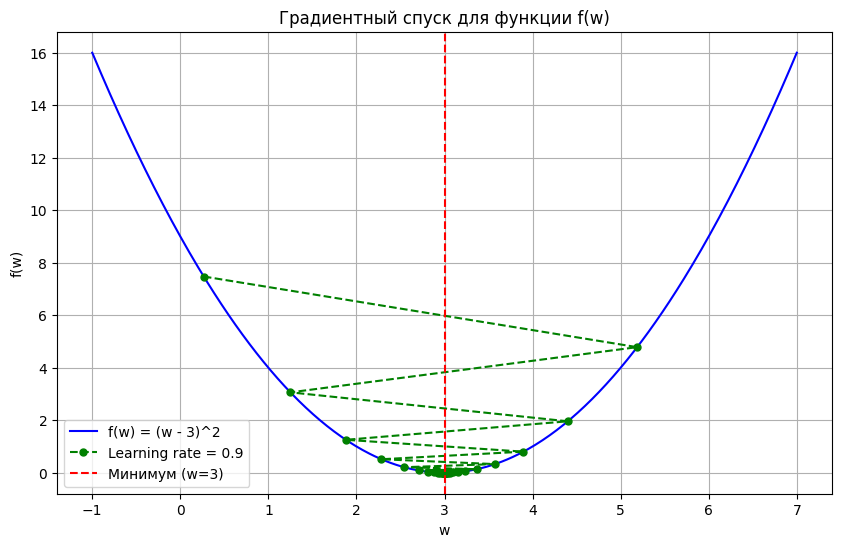

In [ ]:
def plot_GD_1d(learning_rate:float = None):
  coords= Gradient_Discent(derivative_f, w_start=np.random.random(1), learning_rate=learning_rate)

  #plt.plot(coord_1)
  #plt.plot(coord_2, color='green', marker='o', markersize=7)
  plt.figure(figsize = (10, 6))

  values = np.linspace(-1, 7, 400)

  plt.plot(values, f(values), label='f(w) = (w - 3)^2', color='blue')


  plt.plot(coords, f(np.array(coords)),  linestyle='--', color='green', marker='o', markersize=5, label=f'Learning rate = {learning_rate}')

  plt.xlabel('w')
  plt.ylabel('f(w)')
  plt.title('Градиентный спуск для функции f(w)')
  plt.axvline(3, color='red', linestyle='--', label='Минимум (w=3)')
  plt.grid()
  plt.legend()
  plt.show()

plot_GD_1d(learning_rate=0.1)
plot_GD_1d(learning_rate=0.9)

### 11. Запрограммируйте функцию $F(w_1,w_2) ={w_1}^2 + ({w_2} - 3)^2 + 1$, а также её градиент. Вычислите значение и градиент этой функции в случайной точке.

In [ ]:
def f(w_1, w_2):
  return w_1**2 + (w_2 - 3)**2 + 1



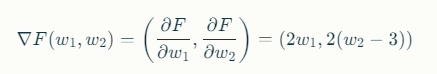

In [ ]:
def grad(w1, w2):
  dF_dw1 = 2 * w1
  dF_dw2 = 2 * (w2 - 3)
  return np.array([dF_dw1, dF_dw2])

In [ ]:
w1, w2 = np.random.rand(2)



print(f'w1 = {w1}\nw2 = {w2}\nfunction = {f(w1, w2)}\ngrad = {grad(w1, w2)}')

w1 = 0.3003515371710461
w2 = 0.5917033498162797
function = 6.890103801167138
grad = [ 0.60070307 -4.8165933 ]


### 12. Реализуйте метод градиентного спуска и найдите точку минимума функции двух переменных $F(w_1,w_2) ={w_1}^2 + ({w_2} - 3)^2 + 1$.
Указание: Для этого модифицируйте функцию GD_1d в функцию GD_2d, принимающую на вход градиент, начальную точку, скорость обучения, количество шагов и реализующую метод градиентного спуска. Обратите внимание, что стартовая точка теперь состоит из двух значений.

In [192]:
def Gradient_Discent_2(grad, w_start, learning_rate=0.1, max_iter=100):
    """
    Реализация градиентного спуска для функций с одним локальным минимумом, совпадающим с глобальным.
    """
    w = np.array(w_start)


    trajectory = [w.copy()]

    for _ in range(max_iter):
      grd=grad(w[0], w[1])
      w = w - learning_rate * grd

      trajectory.append(w.copy())


    return w

In [193]:
Gradient_Discent_2(grad, w_start =[0.0, 0.0], learning_rate=0.1, max_iter=100)

array([0., 3.])

### 13. Визуализируйте процесс нахождения точки минимума функции $F(w_1,w_2) ={w_1}^2 + ({w_2} - 3)^2 + 1$, когда градиентный спуск реализуется с learning_rate = 0.2.
Указание: Для этого напишите функцию plot_GD_2d, которая принимает на вход функцию двух переменных и шаги градиентного спуска, а строит график этой функции с линиями уровня и отмечает на нём точки шагов градиентного спуска, соединённые между собой ломаной линией. Для наглядности в функции plot_GD_2d разверните пространственный график на угол с azim=0.

Точка минимума: [0. 3.]
Значение функции в точке минимума: 1.0


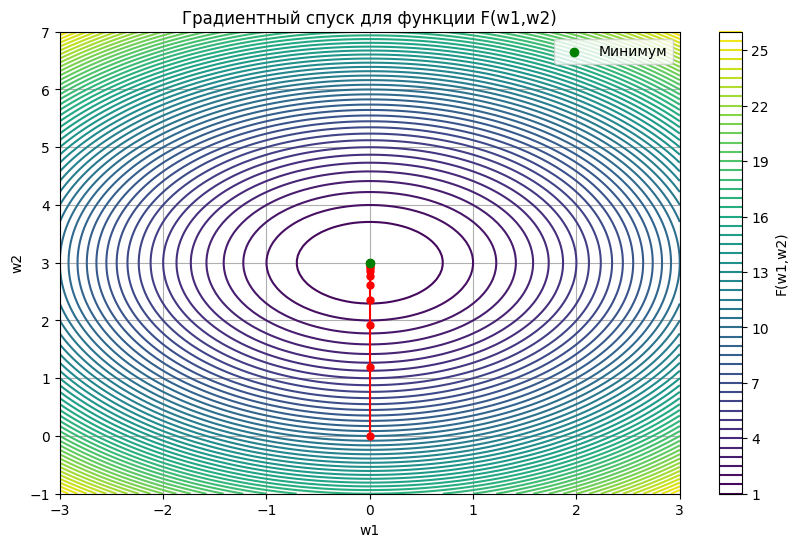

In [195]:

# Определяем функцию F
def F(w1, w2):
    return w1**2 + (w2 - 3)**2 + 1

# Определяем градиент функции F
def gradient_F(w1, w2):
    dF_dw1 = 2 * w1          # Частная производная по w1
    dF_dw2 = 2 * (w2 - 3)    # Частная производная по w2
    return np.array([dF_dw1, dF_dw2])  # Возвращаем градиент в виде массива

# Функция градиентного спуска для двух переменных
def GD_2d(gradient, start_point, learning_rate=0.1, max_iter=100):
    w = np.array(start_point)  # Начальная точка в виде массива
    trajectory = [w.copy()]     # Список для хранения траектории

    for i in range(max_iter):
        grad = gradient(w[0], w[1])  # Вычисляем градиент
        w -= learning_rate * grad     # Обновляем значения w
        trajectory.append(w.copy())    # Сохраняем текущее значение w в траектории

    return w, trajectory

# Пример использования
start_point = [0.0, 0.0]  # Начальная точка (w1=0, w2=0)
learning_rate = 0.2       # Скорость обучения
max_iter = 100            # Максимальное количество итераций

# Находим минимум функции
minimum_point, trajectory = GD_2d(gradient_F, start_point, learning_rate, max_iter)

print("Точка минимума:", minimum_point)
print("Значение функции в точке минимума:", F(minimum_point[0], minimum_point[1]))

# Визуализация траектории градиентного спуска (по желанию)
w1_values = np.linspace(-3, 3, 100)
w2_values = np.linspace(-1, 7, 100)
W1, W2 = np.meshgrid(w1_values, w2_values)
Z = F(W1, W2)

plt.figure(figsize=(10, 6))
plt.contour(W1, W2, Z, levels=50)
trajectory = np.array(trajectory)  # Преобразуем в массив для удобства
plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o', color='red', markersize=5)
plt.title('Градиентный спуск для функции F(w1,w2)')
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar(label='F(w1,w2)')
plt.scatter(minimum_point[0], minimum_point[1], color='green', label='Минимум', zorder=5)
plt.legend()
plt.grid()
plt.show()

### 14. Визуализируйте процесс нахождения точки минимума функции $F(w_1,w_2) ={w_1}^2 + ({w_2} - 3)^2 + 1$, когда градиентный спуск реализуется с learning_rate = 0.8.

Точка минимума: [0. 3.]
Значение функции в точке минимума: 1.0


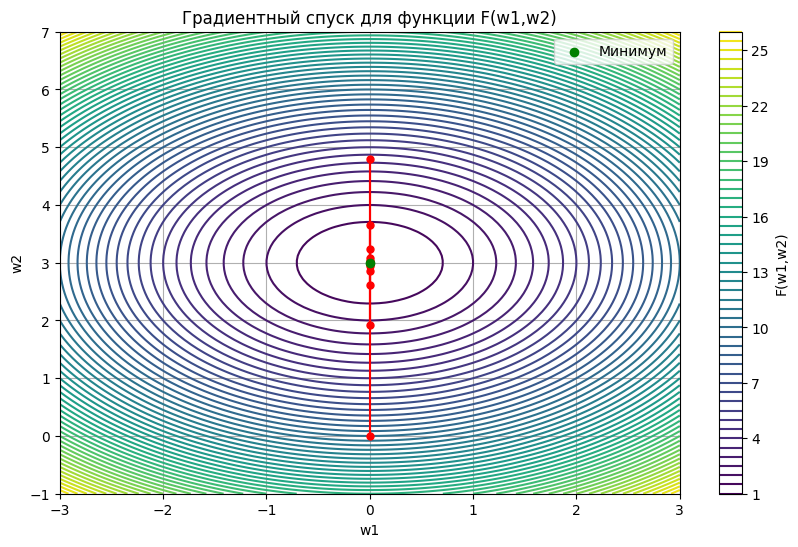

In [196]:

# Определяем функцию F
def F(w1, w2):
    return w1**2 + (w2 - 3)**2 + 1

# Определяем градиент функции F
def gradient_F(w1, w2):
    dF_dw1 = 2 * w1          # Частная производная по w1
    dF_dw2 = 2 * (w2 - 3)    # Частная производная по w2
    return np.array([dF_dw1, dF_dw2])  # Возвращаем градиент в виде массива

# Функция градиентного спуска для двух переменных
def GD_2d(gradient, start_point, learning_rate=0.1, max_iter=100):
    w = np.array(start_point)  # Начальная точка в виде массива
    trajectory = [w.copy()]     # Список для хранения траектории

    for i in range(max_iter):
        grad = gradient(w[0], w[1])  # Вычисляем градиент
        w -= learning_rate * grad     # Обновляем значения w
        trajectory.append(w.copy())    # Сохраняем текущее значение w в траектории

    return w, trajectory

# Пример использования
start_point = [0.0, 0.0]  # Начальная точка (w1=0, w2=0)
learning_rate = 0.8       # Скорость обучения
max_iter = 100            # Максимальное количество итераций

# Находим минимум функции
minimum_point, trajectory = GD_2d(gradient_F, start_point, learning_rate, max_iter)

print("Точка минимума:", minimum_point)
print("Значение функции в точке минимума:", F(minimum_point[0], minimum_point[1]))

# Визуализация траектории градиентного спуска (по желанию)
w1_values = np.linspace(-3, 3, 100)
w2_values = np.linspace(-1, 7, 100)
W1, W2 = np.meshgrid(w1_values, w2_values)
Z = F(W1, W2)

plt.figure(figsize=(10, 6))
plt.contour(W1, W2, Z, levels=50)
trajectory = np.array(trajectory)  # Преобразуем в массив для удобства
plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o', color='red', markersize=5)
plt.title('Градиентный спуск для функции F(w1,w2)')
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar(label='F(w1,w2)')
plt.scatter(minimum_point[0], minimum_point[1], color='green', label='Минимум', zorder=5)
plt.legend()
plt.grid()
plt.show()

### 15. Методом градиентного спуска найдите минимум функции четырёх переменных  $F(w_1,w_2,w_3,w_4) ={w_1}^2 + ({w_2}+5*w_3)^2 + (2*w_4 - 3)^2 + 6$.
Указание: Для этого модифицируйте функцию GD_2d в функцию GD_nd применимую для функций n-переменных. Выводить нужно только точку минимума функции, а значения на каждом шаге - нет, т.к. визуализация в данном случае невозможна. Подберите необходимые значения learning_rate = 0.001 и max_iter=10000.

In [219]:
# Определяем функцию F
def F(**kwargs):
    return kwargs['w1']**2 + (kwargs['w2'] + 5 * kwargs['w3'])**2 + (2 * kwargs['w4'] - 3)**2 + 6

# Определяем градиент функции F
def gradient(w1, w2, w3, w4):
    dF_dw1 = 2 * w1                              # Частная производная по w1
    dF_dw2 = 2 * (w2 + 5 * w3)                   # Частная производная по w2
    dF_dw3 = 10 * (w2 + 5 * w3)                  # Частная производная по w3
    dF_dw4 = 4 * (w4 - 1.5)                      # Частная производная по w4
    return np.array([dF_dw1, dF_dw2, dF_dw3, dF_dw4])  # Возвращаем градиент в виде массива


def GD_nd(gradient, start_point, learning_rate=0.001, max_iter=10000):
    w = np.array(start_point)  # Начальная точка в виде массива


    for i in range(max_iter):
        grad = gradient(*w)  # Вычисляем градиент
        w -= learning_rate * grad     # Обновляем значения w


    return w

In [226]:
min = GD_nd(gradient, start_point=[0., 0., 0., 0.], learning_rate=0.001, max_iter=10000)

min

array([0. , 0. , 0. , 1.5])

### 16. Найдите минимум функции c параметрами a и b $F(w_1, w_2, w_3, w_4, a, b) =a*{w_1}^2 + ({w_2}+5*w_3 + b)^2 + (2*w_4 - 3)^2 + 6$. методом градиентного спуска. В качестве значений параметров возьмите $a=5, b =-7$ и $a=-2, b =3$.

Указание: Добавьте в функцию GD_nd параметры a и b, назовите, полученную функцию GD.

In [247]:
def F(w1, w2, w3, w4, a, b):
    return a * w1**2 + (w2 + 5 * w3 + b)**2 + (2 * w4 - 3)**2 + 6

# Определяем градиент функции F
def gradient(w1, w2, w3, w4, a, b):
    dF_dw1 = 2 * w1 * a                              # Частная производная по w1
    dF_dw2 = 2 * (w2 + 5 * w3 + b)                   # Частная производная по w2
    dF_dw3 = 10 * (w2 + 5 * w3 + b)                  # Частная производная по w3
    dF_dw4 = 4 * (w4 - 1.5)                      # Частная производная по w4
    return np.array([dF_dw1, dF_dw2, dF_dw3, dF_dw4])  # Возвращаем градиент в виде массива


def GD(gradient, start_point, learning_rate=0.001, max_iter=10000, a=0, b=0):
    w = np.array([0.0, 0.0, 0.0, 0.0])  # Начальная точка в виде массива


    for i in range(max_iter):
        grad = gradient(*w, a, b)  # Вычисляем градиент
        w -= learning_rate * grad     # Обновляем значения w


    return w

In [248]:
min_1 = GD(gradient, start_point=[0., 0., 0., 0.], learning_rate=0.001, max_iter=10000, a=5, b=-7)

min_2 = GD(gradient, start_point=[0., 0., 0., 0.], learning_rate=0.001, max_iter=10000, a=-2, b=3)

print(min_1, min_2)

[0.         0.26923077 1.34615385 1.5       ] [ 0.         -0.11538462 -0.57692308  1.5       ]


### 17. Создайте класс GradientDiscent, реализующий метод градиентного спуска для функции $F(w_1, w_2, w_3, w_4, a, b) =a*{w_1}^2 + ({w_2}+5*w_3 + b)^2 + (2*w_4 - 3)^2 + 6$. Найдите минимумы при различных a и b.
Указание: Укажите в конструкторе класса атрибуты: w и количество итераций. Добавьте в класс методы gradient_F и GD. Создайте метод fit, который вызывает функцию GD.

In [283]:
class GradientDiscent():
  def __init__(self, w, max_iter):
    self.w = None
    self.max_iter = None


  def gradient_F(w1, w2, w3, w4, a, b, self):
    dF_dw1 = 2 * w1 * a
    dF_dw2 = 2 * (w2 + 5 * w3 + b)
    dF_dw3 = 10 * (w2 + 5 * w3 + b)
    dF_dw4 = 4 * (w4 - 1.5)
    return np.array([dF_dw1, dF_dw2, dF_dw3, dF_dw4])

  def GD(gradient_F,  a, b, start_point, self, learning_rate=0.001):
    self.w = np.array(start_point)  # Начальная точка в виде массива


    for _ in range(self.max_iter):
        grad = gradient(*self.w, a, b)  # Вычисляем градиент
        self.w -= learning_rate * grad     # Обновляем значения w

    return self.w

  def fit(a, b):
    return GD(gradient_F,  a=a, b=b, start_point=[0.0, 0.0, 0.0, 0.0], learning_rate=0.001)

In [285]:
test = GradientDiscent(None, None)
test.fit(5, 6)

TypeError: GradientDiscent.fit() takes 2 positional arguments but 3 were given

### 18. Модифицируйте класс GradientDiscent в класс GradientDiscent_err, таким образом, чтобы алгоритм градиентного спуcка останавливался, когда искомое значение точки минимума перестаёт существенно меняться. Добавьте в класс атрибут, выводящий количество сделанных шагов.
Указание: Для этого в метод GD добавьте вычисление средней абсолютной ошибки изменения значений между предыдущим и последующим шагом. Если ошибка станет меньше некоторой заранее заданной очень маленькой величины (error_reduction=0.0000001) - выходите из цикла.